In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from glob import glob
from operator import itemgetter


sys.path.insert(0,'/home/ROBARTS/myousif/software/hippunfold_toolbox/')
from hippunfold_toolbox import plotting

In [2]:
def reshape_1D(array):
    arr_split = np.split(array,2)
    return np.stack(arr_split).T

def reshape4surfplot(input_arr):
    multi_arr = []
    for arr in input_arr:
        multi_arr.append(reshape_1D(arr))
    return np.stack(multi_arr,axis=2)


In [3]:
metric_names = ['thickeness','curvature','gyrification','myelination']

In [4]:
os.getcwd()

'/home/ROBARTS/myousif/projects_inprogress/hippocharts/scripts'

In [20]:
thick_train_mean = np.loadtxt('../data/training_data/thickness_den-2mm_IDP.txt').mean(axis=0)
gyr_train_mean = np.loadtxt('../data/training_data/gyrification_den-2mm_IDP.txt').mean(axis=0)
myelin_train_mean = np.loadtxt('../data/training_data/myelin_den-2mm_desc-thresholded_zscore-1p75_IDP.txt').mean(axis=0)
fa_train_mean = np.loadtxt('../data/training_data/fa_den-2mm_desc-thresholded_zscore-1p4_IDP.txt').mean(axis=0)
md_train_mean = np.loadtxt('../data/training_data/md_den-2mm_desc-thresholded_zscore-1p6_IDP.txt').mean(axis=0)

In [7]:
fa_rmse = np.loadtxt('../models/fa_den-2mm_model/RMSE_estimate.txt')
fa_ev = np.loadtxt('../models/fa_den-2mm_model/EXPV_estimate.txt')

myelin_rmse = np.loadtxt('../models/myelin_den-2mm_model/RMSE_estimate.txt')
myelin_ev = np.loadtxt('../models/myelin_den-2mm_model/EXPV_estimate.txt')

md_rmse = np.loadtxt('../models/md_den-2mm_model/RMSE_estimate.txt')
md_ev = np.loadtxt('../models/md_den-2mm_model/EXPV_estimate.txt')

/home/ROBARTS/myousif/virtualenvs/pcntoolkit_dev_cbs_venv/lib/python3.8/site-packages/brainspace-0.1.10-py3.8.egg/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


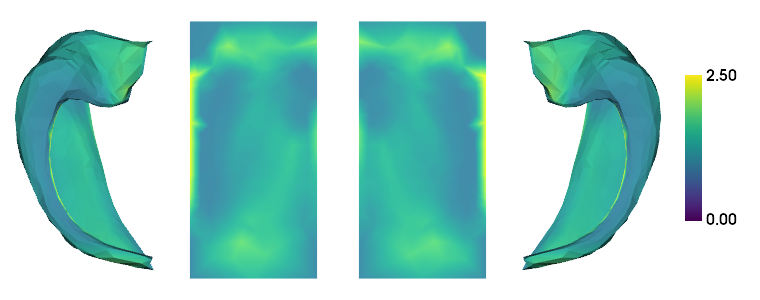

In [22]:
plotting.surfplot_canonical_foldunfold(reshape_1D(thick_train_mean),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,2.5))

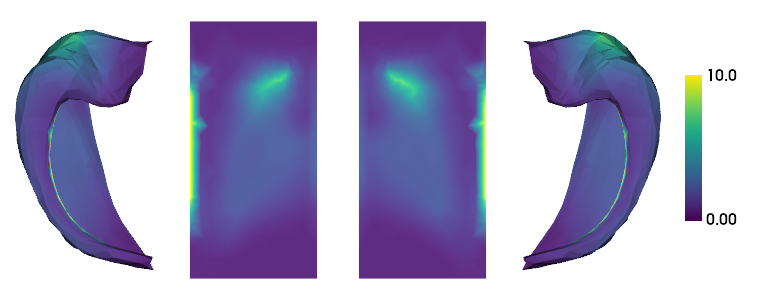

In [34]:
plotting.surfplot_canonical_foldunfold(reshape_1D(gyr_train_mean),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,10)
                                      )

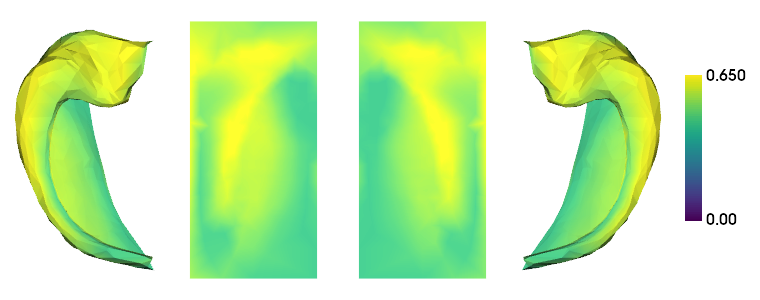

In [30]:
plotting.surfplot_canonical_foldunfold(reshape_1D(myelin_train_mean),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,0.65)
                                      )

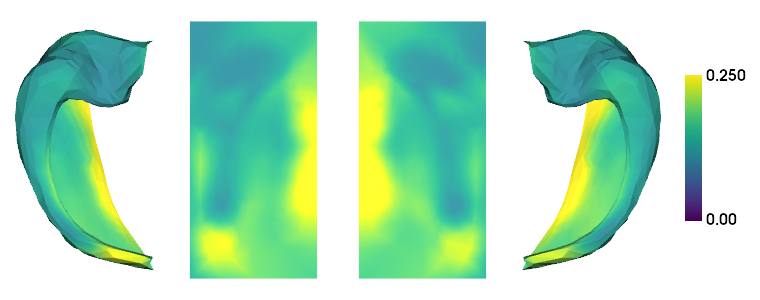

In [33]:
plotting.surfplot_canonical_foldunfold(reshape_1D(fa_train_mean),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,0.25)
                                      )

In [6]:

rmse_paths = glob('*_2mm_bspline_blr_model/RMSE_estimate.txt')
smse_paths = glob('*_2mm_bspline_blr_model/SMSE_estimate.txt')
expv_paths = glob('*_2mm_bspline_blr_model/EXPV_estimate.txt')


In [7]:
rmse_paths = itemgetter(3,1,2,0)(rmse_paths)
smse_paths = itemgetter(3,1,2,0)(smse_paths)
expv_paths = itemgetter(3,1,2,0)(expv_paths)

In [9]:
rmse = [np.loadtxt(p) for p in rmse_paths]
smse = [np.loadtxt(p) for p in smse_paths]
expv = [np.loadtxt(p) for p in expv_paths]

In [10]:
reshape_1D(rmse[0]).shape

(419, 2)

In [12]:
np.stack([reshape_1D(rmse[0]),reshape_1D(smse[0])],axis=1).shape

(419, 2, 2)

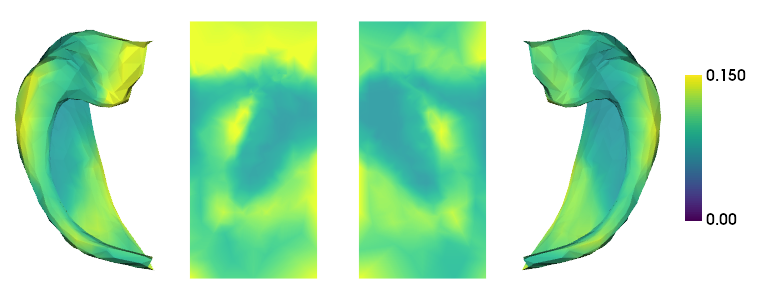

In [28]:
plotting.surfplot_canonical_foldunfold(reshape_1D(myelin_rmse),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,0.15)
                                      )

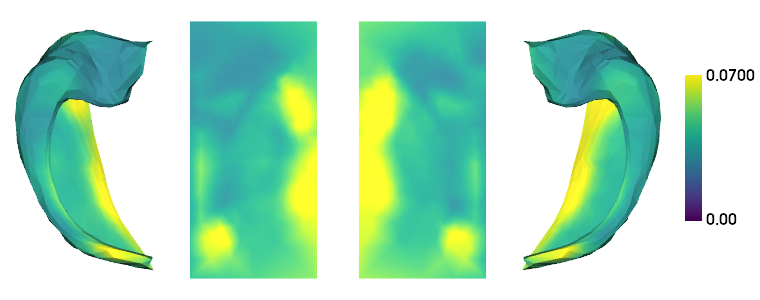

In [12]:
plotting.surfplot_canonical_foldunfold(reshape_1D(fa_rmse),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,.07))

/home/ROBARTS/myousif/virtualenvs/pcntoolkit_dev_cbs_venv/lib/python3.8/site-packages/brainspace-0.1.10-py3.8.egg/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


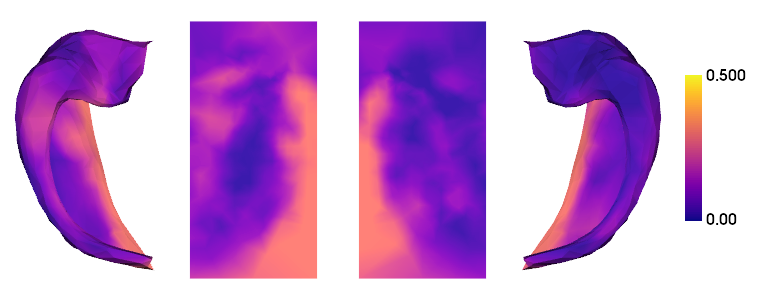

In [15]:
plotting.surfplot_canonical_foldunfold(reshape_1D(fa_ev),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,.5))

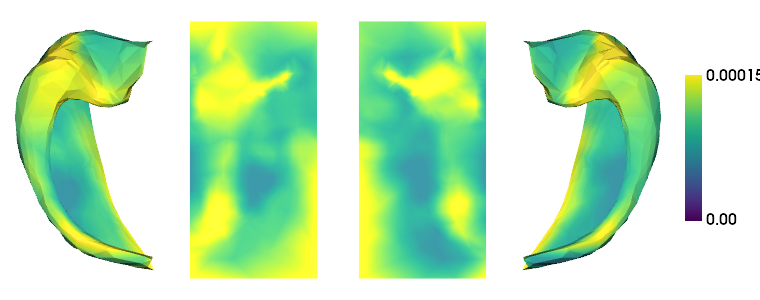

In [37]:
plotting.surfplot_canonical_foldunfold(reshape_1D(md_rmse),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,.00015)
                                      )

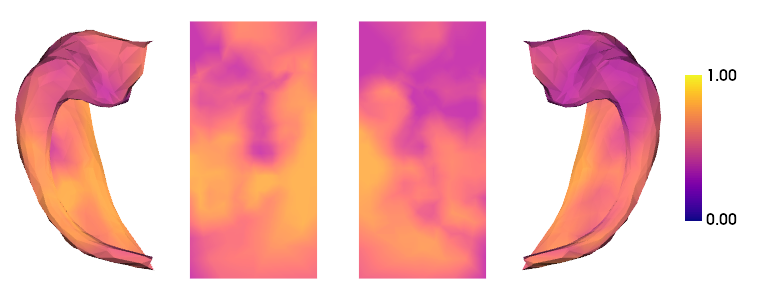

In [40]:
plotting.surfplot_canonical_foldunfold(reshape_1D(md_ev),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,1)
                                      )

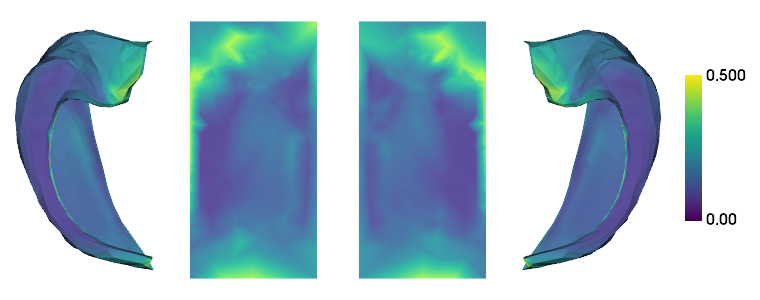

In [14]:
plotting.surfplot_canonical_foldunfold(reshape_1D(rmse[0]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                      color_range=(0,.5))

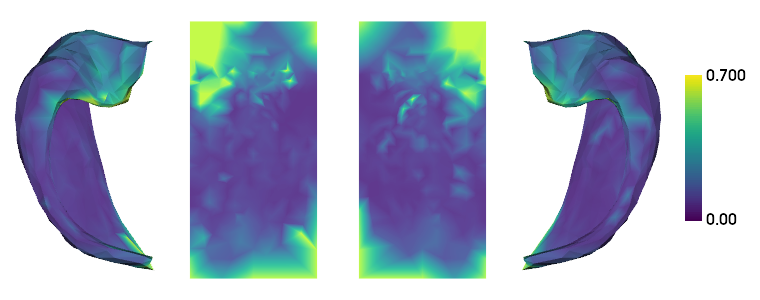

In [19]:
plotting.surfplot_canonical_foldunfold(reshape_1D(rmse[1]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,.7))

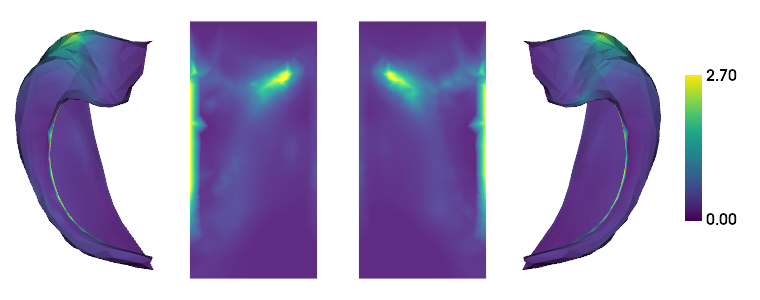

In [25]:
plotting.surfplot_canonical_foldunfold(reshape_1D(rmse[2]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,2.7))

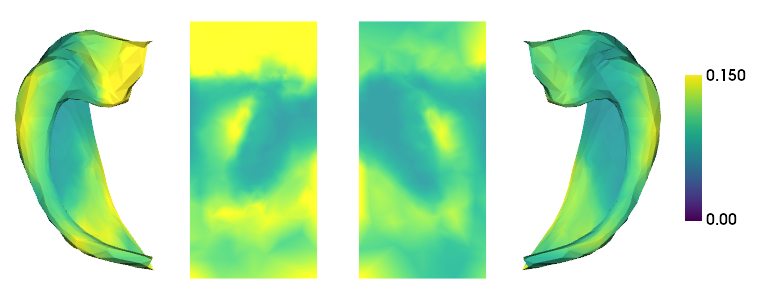

In [24]:
plotting.surfplot_canonical_foldunfold(reshape_1D(rmse[3]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       color_range=(0,0.15))

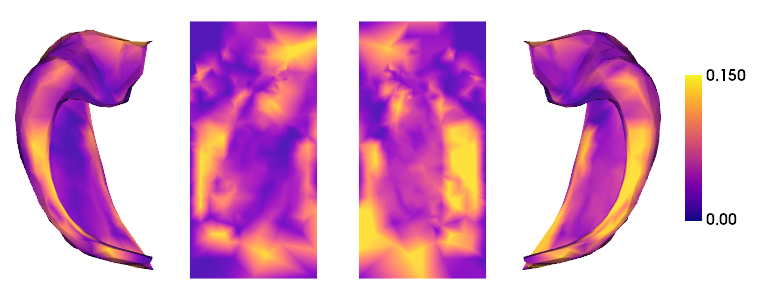

In [44]:
plotting.surfplot_canonical_foldunfold(reshape_1D(expv[0]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,0.15))

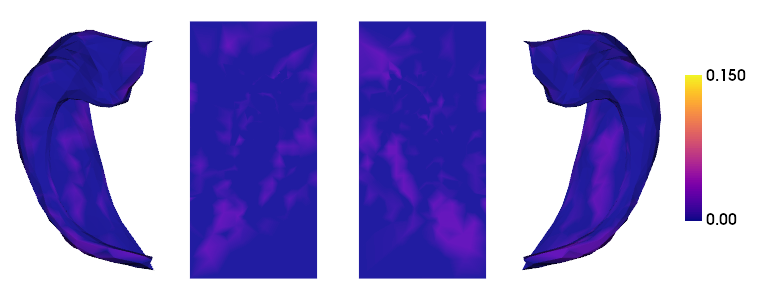

In [47]:
plotting.surfplot_canonical_foldunfold(reshape_1D(expv[1]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,0.15))

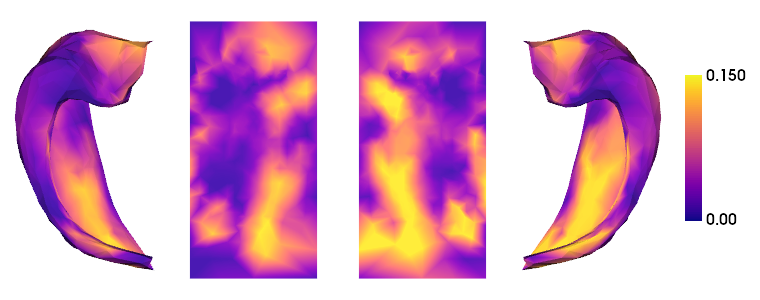

In [48]:
plotting.surfplot_canonical_foldunfold(reshape_1D(expv[2]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,0.15))

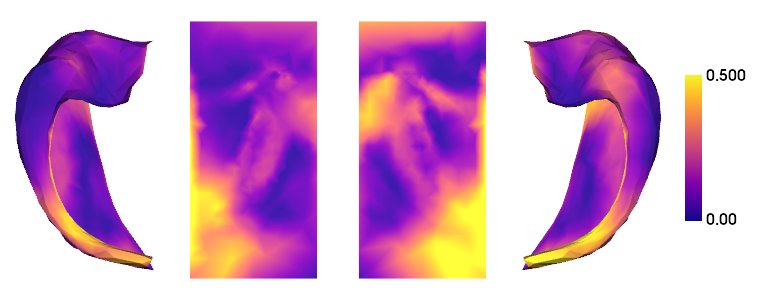

In [39]:
plotting.surfplot_canonical_foldunfold(reshape_1D(expv[3]),
                                       labels=['hipp'],
                                       den='2mm',
                                       tighten_cwindow=True, 
                                       embed_nb=True, 
                                       color_bar='right',
                                       share='row',
                                       cmap='plasma',
                                       color_range=(0,0.5))

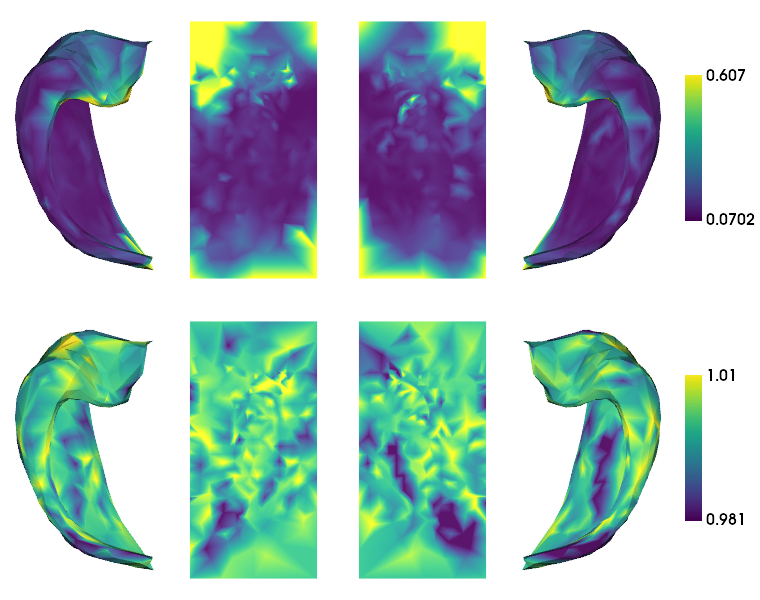

In [48]:
plotting.surfplot_canonical_foldunfold(np.stack([reshape_1D(rmse[1]),reshape_1D(smse[1])],axis=2),labels=['hipp'],den='2mm',tighten_cwindow=True, embed_nb=True, color_bar='right',share='row')

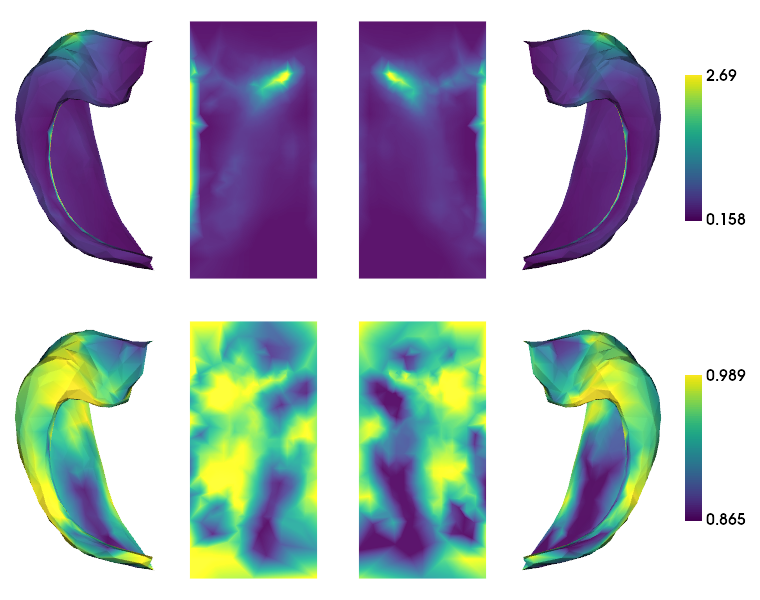

In [49]:
plotting.surfplot_canonical_foldunfold(np.stack([reshape_1D(rmse[2]),reshape_1D(smse[2])],axis=2),labels=['hipp'],den='2mm',tighten_cwindow=True, embed_nb=True, color_bar='right',share='row')

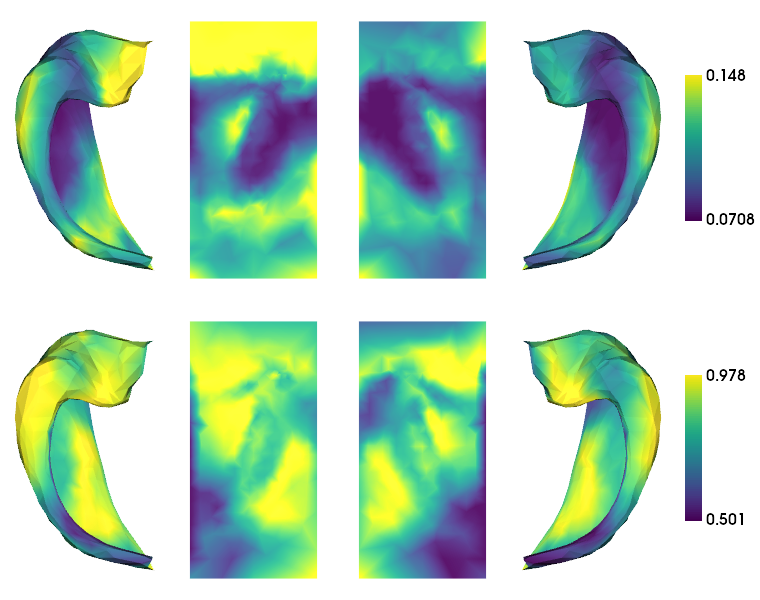

In [50]:
plotting.surfplot_canonical_foldunfold(np.stack([reshape_1D(rmse[3]),reshape_1D(smse[3])],axis=2),labels=['hipp'],den='2mm',tighten_cwindow=True, embed_nb=True, color_bar='right',share='row')

In [23]:
rmse_zscore = [(m - m.mean())/m.std(ddof=1) for m in rmse]

In [28]:
rmse_zscore_df = pd.DataFrame(dict(zip(metric_names,rmse_zscore)))

In [68]:
list(itemgetter(0,2,3)(metric_names))

['thickeness', 'gyrification', 'myelination']

<AxesSubplot: >

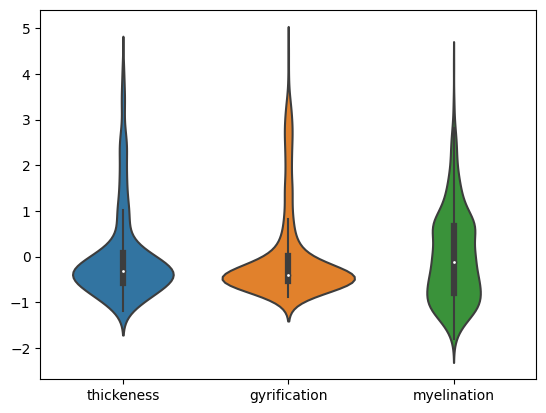

In [69]:
sns.violinplot(rmse_zscore_df[list(itemgetter(0,2,3)(metric_names))])

/home/ROBARTS/myousif/virtualenvs/pcntoolkit_dev_cbs_venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot: >

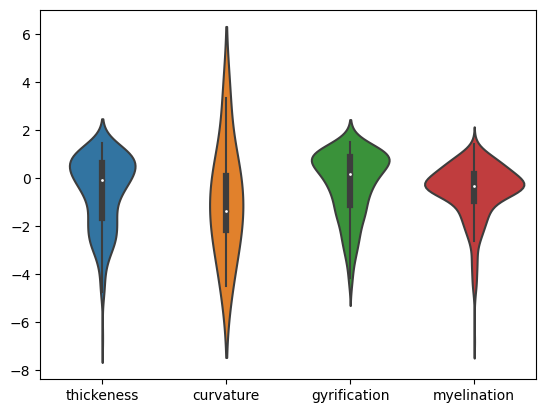

In [51]:
sns.violinplot(rmse_zscore_df)

In [56]:
np.log(.1)

-2.3025850929940455